In [25]:
import tensorflow as tf
print(tf.__version__)

from matplotlib import pyplot as plt
import random

2.1.0


In [26]:
num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
# 生成标准差为1的输入数据
features = tf.random.normal((num_examples,num_inputs),stddev=1)
labels = true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
# 随机加上标准差为0.01的噪音
labels += tf.random.normal(labels.shape,stddev=0.01)

In [27]:
print(features[0],labels[0])



tf.Tensor([ 0.60977983 -0.21984003], shape=(2,), dtype=float32) tf.Tensor(6.182882, shape=(), dtype=float32)


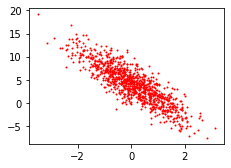

In [28]:
def set_figsize(figsize=(3.5,2.5)):
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.scatter(features[:,1],labels,c='r',s=1)

In [29]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j = indices[i:min(i+batch_size,num_examples)]
        # gather 根据indices切片
        yield tf.gather(features,axis=0,indices=j),tf.gather(labels,axis=0,indices=j)

In [30]:
batch_size = 64

for X,y in data_iter(batch_size,features,labels):
    print(X,y)
    break

tf.Tensor(
[[-1.568652    1.1892316 ]
 [ 0.02704381 -1.2114034 ]
 [ 0.54140687  0.6874146 ]
 [-0.3238443  -0.7069099 ]
 [ 0.670013    1.0555037 ]
 [ 1.4785416  -0.02862001]
 [-1.5540386  -0.90648144]
 [-2.657925   -0.34048915]
 [-0.13981636  0.45385957]
 [-0.0776669  -0.02562523]
 [ 0.15774341  1.3849018 ]
 [ 0.9904404   0.49320254]
 [-0.5353007   1.9172873 ]
 [-0.7673046   1.2029607 ]
 [ 1.9484698  -0.25718805]
 [-1.5775664   0.23291822]
 [ 1.2565771  -0.39332908]
 [ 0.5235608  -0.60813963]
 [ 0.2633382  -1.6159766 ]
 [ 1.8978524   1.3576044 ]
 [-0.40452728  0.02824024]
 [-0.6108405   0.1997418 ]
 [ 0.28169724 -1.2480029 ]
 [ 1.1958692   2.5761182 ]
 [-0.01832403  0.2854444 ]
 [ 0.02692759 -0.79011744]
 [ 1.9638565   0.14134032]
 [-0.53969157 -1.1126633 ]
 [ 1.3907293  -1.3411927 ]
 [-1.2987695   1.61959   ]
 [-2.0938413  -0.20309015]
 [-0.9750384   0.8229153 ]
 [-1.7626753   0.4005635 ]
 [ 0.22338685 -0.72602   ]
 [-0.21097755 -0.3210915 ]
 [-1.3122041   2.3579533 ]
 [-0.3418174  -1.

In [31]:
# 初始化参数
w = tf.Variable(tf.random.normal((num_inputs,1),stddev=0.01))
b = tf.Variable(tf.zeros((1,)))

In [32]:
def linreg(X,w,b):
    return tf.matmul(X,w)+b

In [33]:
def squared_loss(y_hat,y):
    return (y_hat-tf.reshape(y,y_hat.shape))**2/2

In [34]:
# 更新参数
def sgd(params,lr,batch_size,grads):
    for i,param in enumerate(params):
        param.assign_sub(lr*grads[i]/batch_size)

In [35]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        with tf.GradientTape() as t:
            t.watch([w,b])
            # 定义损失函数
            l = loss(net(X,w,b),y)
        grads = t.gradient(l,[w,b])
        sgd([w,b],lr,batch_size,grads)
    train_l = loss(net(features,w,b),labels)
    print('epoch %d, loss %f'.format(epoch+1,tf.reduce_mean(train_l)))

epoch %d, loss %f
epoch %d, loss %f
epoch %d, loss %f


In [36]:
print(true_w,w)
print(true_b,b)



[2, -3.4] <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 1.6446801],
       [-2.5876393]], dtype=float32)>
4.2 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([3.159864], dtype=float32)>
